In [11]:
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy as sp
from sklearn import cluster, datasets
import matplotlib.image as mping

In [2]:
#funkcija_5_1

def generate_data(n_samples, flagc):
    
    if flagc == 1:
        random_state = 365
        X,y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
        
    elif flagc == 2:
        random_state = 148
        X,y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
        transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
        X = np.dot(X, transformation)
        
    elif flagc == 3:
        random_state = 148
        X, y = datasets.make_blobs(n_samples=n_samples,
                          cluster_std=[1.0, 2.5, 0.5, 3.0],
                          random_state=random_state)

    elif flagc == 4:
        X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
        
    elif flagc == 5:
        X, y = datasets.make_moons(n_samples=n_samples, noise=.05)
    
    else:
        X = []
        
    return X



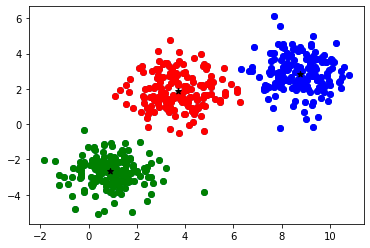

In [4]:
#1. zadatak
data = generate_data(500,1)

dataFrame = pd.DataFrame(data, columns = ['x','y'])
plt.scatter(dataFrame.x, dataFrame.y)

kmeans_model = KMeans(n_clusters = 3)
predicted_cluster = kmeans_model.fit_predict(dataFrame[['x','y']])
dataFrame['cluster'] = predicted_cluster
centroids = kmeans_model.cluster_centers_

dataFrame1 = dataFrame[dataFrame.cluster == 0]
dataFrame2 = dataFrame[dataFrame.cluster == 1]
dataFrame3 = dataFrame[dataFrame.cluster == 2]


plt.scatter(dataFrame1.x, dataFrame1.y, color='red')
plt.scatter(dataFrame2.x, dataFrame2.y, color='green')
plt.scatter(dataFrame3.x, dataFrame3.y, color='blue')
plt.scatter(centroids[:,0], centroids[:,1], marker = '*', color = 'black',)


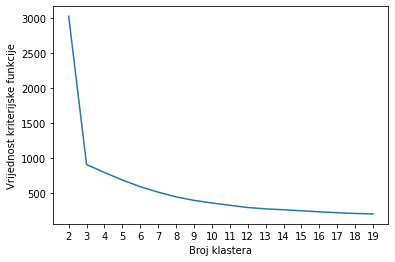

In [5]:
#2. zadatak
values = []

for i in range(2, 20):
    model = KMeans(n_clusters = i)
    model.fit(dataFrame[['x','y']])
    values.append(model.inertia_)
   
plt.figure()    
plt.xlabel('Broj klastera')
plt.ylabel('Vrijednost kriterijske funkcije')
plt.xticks(range(1, 20))
plt.plot(range(2, 20), values)  

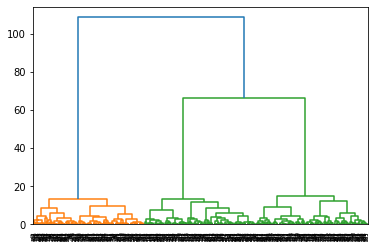

In [6]:
#3. zadatak
plt.figure()

dendroGram = dendrogram(linkage(data, method = "ward"))

<Figure size 432x288 with 0 Axes>

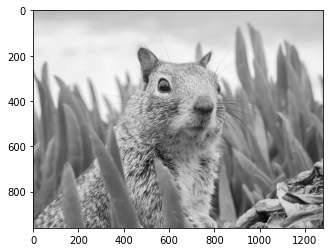

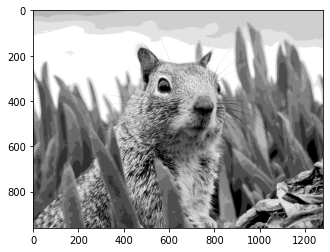

In [12]:
#4. zadatak
face = mping.imread('example_grayscale.png')
plt.figure(0)

X = face.reshape((-1, 1))
k_means = cluster.KMeans(n_clusters = 10, n_init = 1)
k_means.fit(X)
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_
face_compressed = np.choose(labels, values)
face_compressed.shape = face.shape

plt.figure(1)
plt.imshow(face, cmap = 'gray')
plt.figure(2)
plt.imshow(face_compressed, cmap = 'gray') 